Importing the Dependencies

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


Data Collection and Analysis

PIMA Diabetes Dataset

In [5]:
diabetes_dataset = pd.read_csv('/Users/ananya/Desktop/Python/diabetes predictor/data/diabetes.csv')

In [6]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
diabetes_dataset.shape

(768, 9)

In [9]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [11]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [12]:
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [13]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [14]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [17]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)



#SVM



In [18]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, Y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

Accuracy Score

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("SVM Accuracy:", accuracy_score(Y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_svm))


SVM Accuracy: 0.7272727272727273

Confusion Matrix:
 [[88 12]
 [30 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       100
           1       0.67      0.44      0.53        54

    accuracy                           0.73       154
   macro avg       0.71      0.66      0.67       154
weighted avg       0.72      0.73      0.71       154



Making a Predictive System

In [20]:
input_data = (5,166,72,19,175,25.8,0.587,51)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = svm_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.344238    1.40148656  0.12781322 -0.10834817  0.77530224 -0.79714106
   0.34797285  1.51129009]]
[1]
The person is diabetic


/Users/ananya/Desktop/Python/diabetes predictor/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# K Nearest Neighbhours

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, Y_train)

y_pred_knn = knn.predict(X_test_scaled)

acc_knn = accuracy_score(Y_test, y_pred_knn)
print("KNN Accuracy:", acc_knn)

print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_knn))


KNN Accuracy: 0.7142857142857143

Confusion Matrix:
 [[87 13]
 [31 23]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.87      0.80       100
           1       0.64      0.43      0.51        54

    accuracy                           0.71       154
   macro avg       0.69      0.65      0.65       154
weighted avg       0.70      0.71      0.70       154



In [22]:
accuracy_scores = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, Y_train)
    score = model.score(X_test_scaled, Y_test)
    accuracy_scores.append(score)
    print(f"k = {k}, Accuracy = {score:.4f}")

k = 1, Accuracy = 0.6688
k = 2, Accuracy = 0.6558
k = 3, Accuracy = 0.6948
k = 4, Accuracy = 0.6883
k = 5, Accuracy = 0.7143
k = 6, Accuracy = 0.6818


k = 7, Accuracy = 0.7013
k = 8, Accuracy = 0.7078
k = 9, Accuracy = 0.7338
k = 10, Accuracy = 0.7403
k = 11, Accuracy = 0.7338
k = 12, Accuracy = 0.7273
k = 13, Accuracy = 0.7338
k = 14, Accuracy = 0.7078
k = 15, Accuracy = 0.7273
k = 16, Accuracy = 0.7208
k = 17, Accuracy = 0.7273
k = 18, Accuracy = 0.7078
k = 19, Accuracy = 0.7208
k = 20, Accuracy = 0.7208


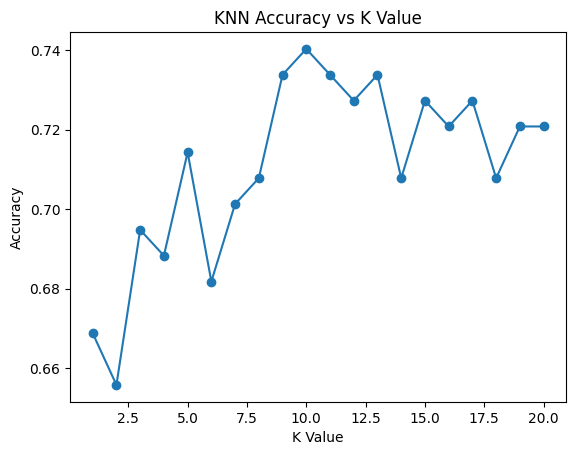

In [23]:
import matplotlib.pyplot as plt

plt.plot(range(1, 21), accuracy_scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs K Value')
plt.show()

# Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, Y_train)

y_pred_nb = nb.predict(X_test)

acc_nb = accuracy_score(Y_test, y_pred_nb)
print("Naive Bayes Accuracy:", acc_nb)

print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_nb))


Naive Bayes Accuracy: 0.7727272727272727

Confusion Matrix:
 [[88 12]
 [23 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.72      0.57      0.64        54

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



# Decision Trees


Accuracy: 0.7467532467532467

Confusion Matrix:
 [[75 24]
 [15 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



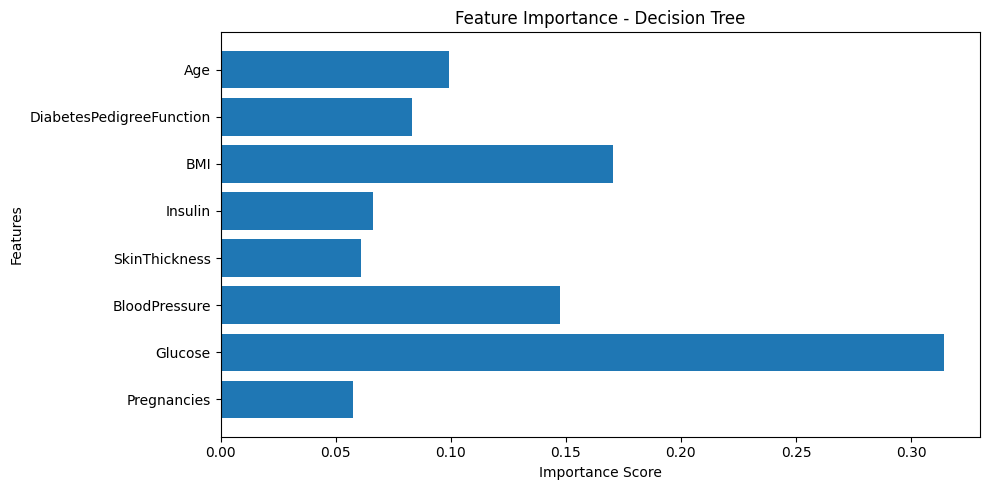

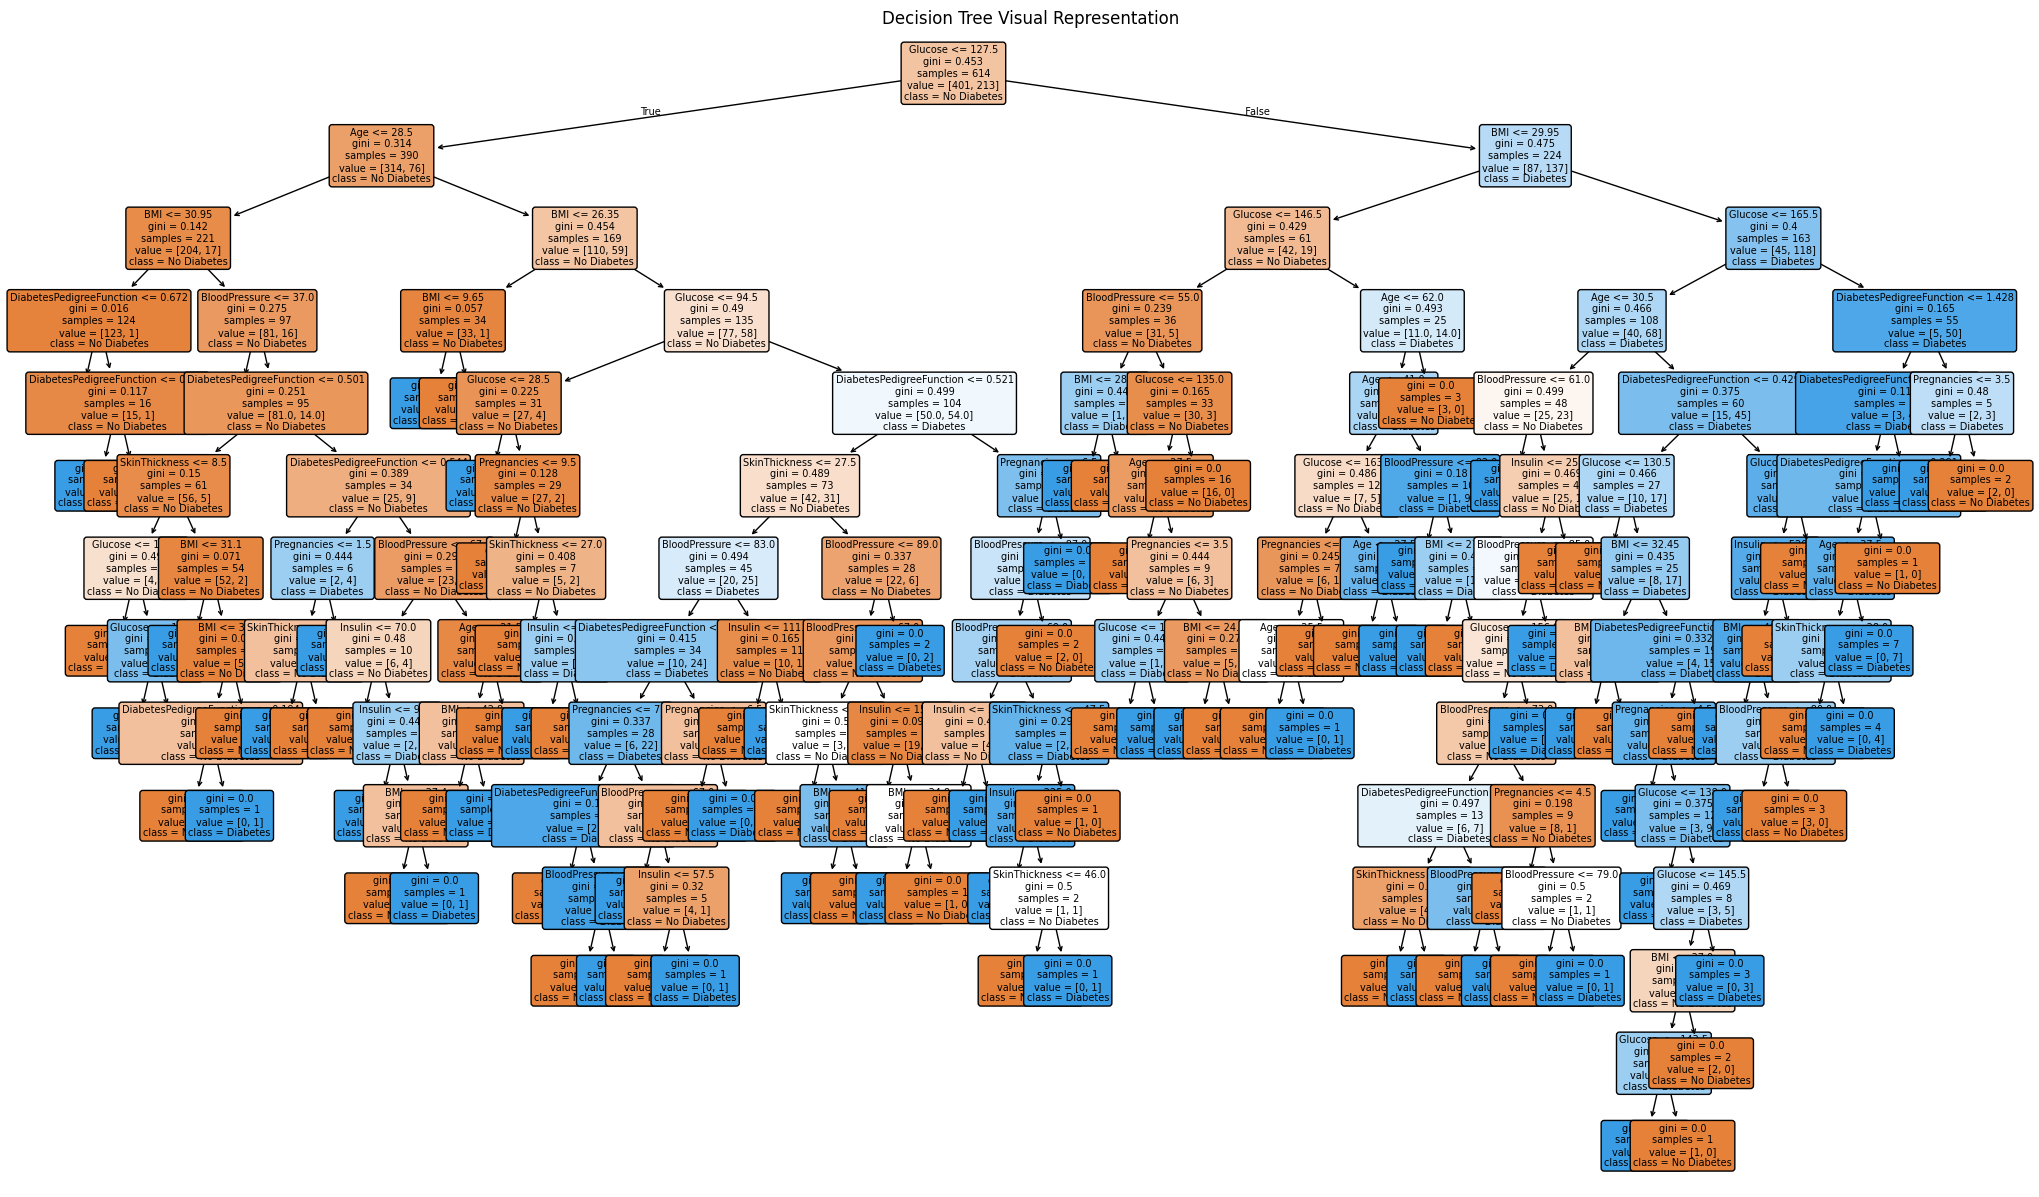

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("/Users/ananya/Desktop/Python/diabetes predictor/data/diabetes.csv")

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dt = DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    random_state=42
)

dt.fit(X_train, Y_train)

# Predictions & Evaluation
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))


importances = dt.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,5))
plt.barh(feature_names, importances)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Decision Tree")
plt.tight_layout()
plt.show()

plt.figure(figsize=(25,15))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["No Diabetes", "Diabetes"],
    filled=True,
    rounded=True,
    fontsize=7
)
plt.title("Decision Tree Visual Representation")
plt.show()


# Random Forest

Accuracy: 0.7337662337662337

Confusion Matrix:
 [[78 21]
 [20 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



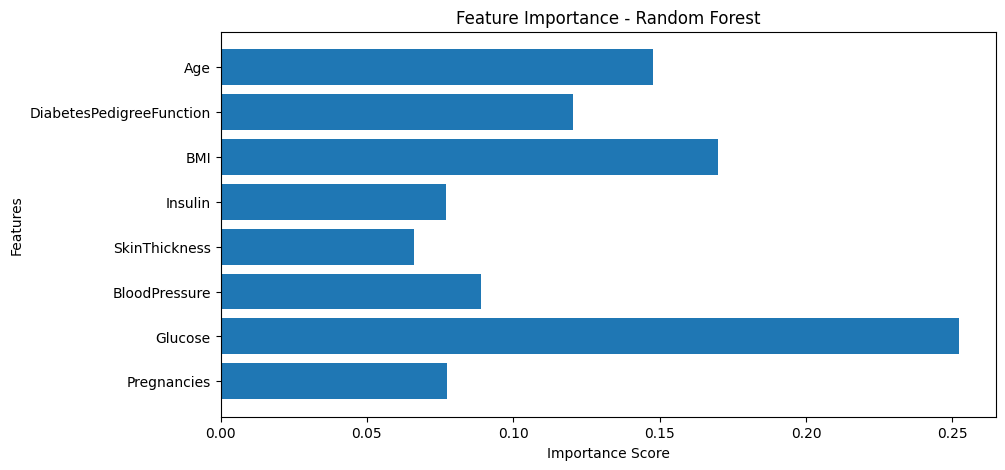

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rf = RandomForestClassifier(
    n_estimators=200,
    criterion="gini",
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf.fit(X_train, Y_train)

# Predictions & Evaluation
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))

importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,5))
plt.barh(feature_names, importances)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Random Forest")
plt.show()


# **MODEL COMPARISON**

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd

# Define models
models = {
    "SVM": SVC(kernel='rbf', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Define which models need scaling
scale_models = ["SVM", "KNN"]

# Define scalers to test for SVM and KNN
scalers = {
    "None": None,
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

comparison_results = {}

for name, model in models.items():
    if name in scale_models:
        best_acc = 0
        best_scaler_name = "None"
        # Try all scalers and pick the one with highest accuracy
        for scaler_name, scaler in scalers.items():
            if scaler is not None:
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)
            else:
                X_train_scaled = X_train.values if hasattr(X_train, 'values') else X_train
                X_test_scaled = X_test.values if hasattr(X_test, 'values') else X_test

            model.fit(X_train_scaled, Y_train)
            y_pred = model.predict(X_test_scaled)
            acc = accuracy_score(Y_test, y_pred)
            if acc > best_acc:
                best_acc = acc
                best_scaler_name = scaler_name
        comparison_results[name] = best_acc
        print(f"{name}: Best scaler = {best_scaler_name}, Accuracy = {best_acc:.4f}")
    else:
        # Models that do not need scaling
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(Y_test, y_pred)
        comparison_results[name] = acc

comparison_df = pd.DataFrame.from_dict(comparison_results, orient='index', columns=['Accuracy'])
print("\n=== MODEL COMPARISON TABLE ===\n")
print(comparison_df)


SVM: Best scaler = None, Accuracy = 0.7662
KNN: Best scaler = RobustScaler, Accuracy = 0.7208

=== MODEL COMPARISON TABLE ===

               Accuracy
SVM            0.766234
KNN            0.720779
Decision Tree  0.746753
Random Forest  0.720779
Naive Bayes    0.766234


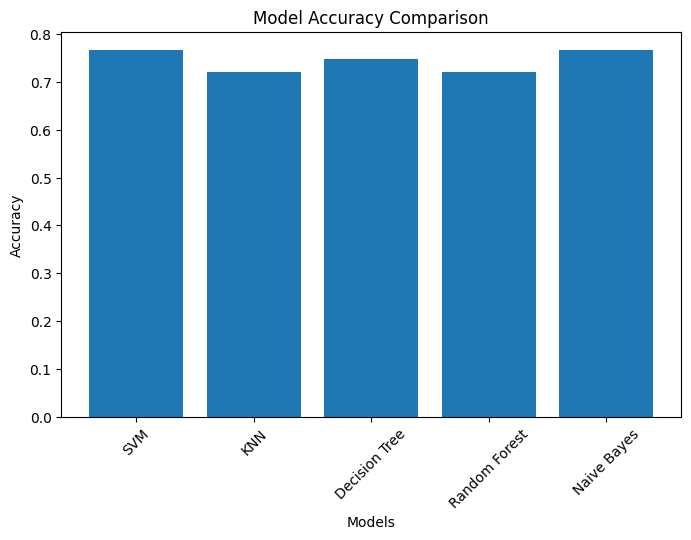

In [28]:
plt.figure(figsize=(8,5))
plt.bar(comparison_results.keys(), comparison_results.values())
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()


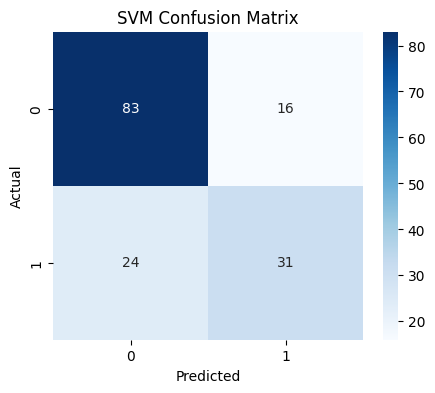

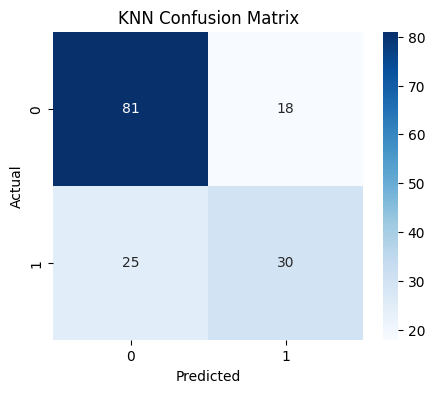

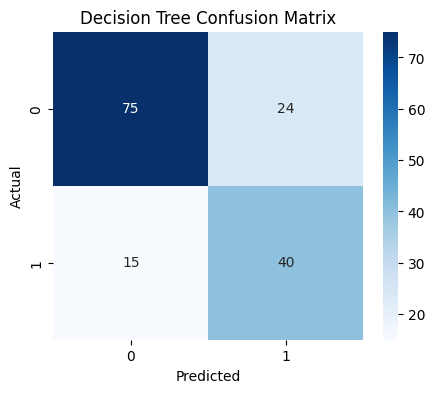

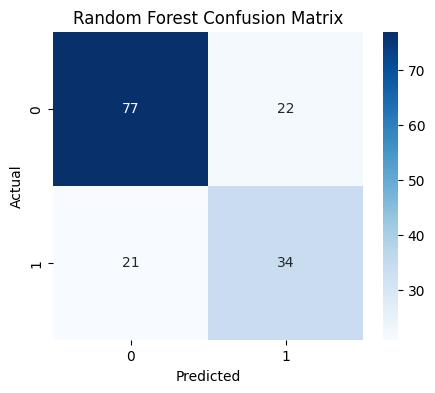

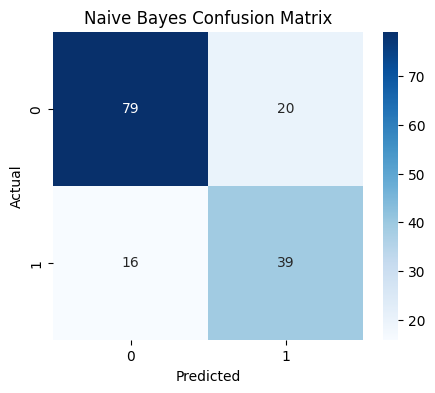

In [29]:
import seaborn as sns
for name, model in models.items():
    if name in ["SVM", "KNN"]:
        X_test_used = X_test_scaled
    else:
        X_test_used = X_test  # unscaled for DT, RF, NB

    y_pred = model.predict(X_test_used)
    cm = confusion_matrix(Y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


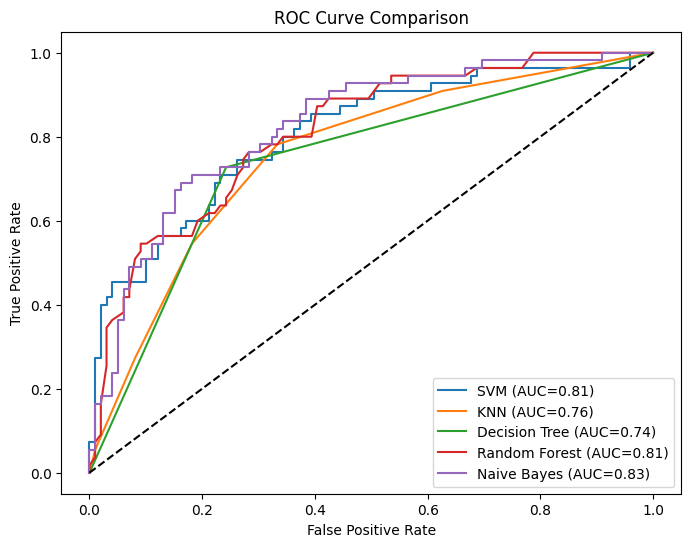

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for name, model in models.items():
    # Pick correct test data for each model
    if name in ["SVM", "KNN"]:
        X_test_used = X_test_scaled
    else:
        X_test_used = X_test

    # Get predicted probabilities or decision function
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_used)[:,1]
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test_used)
    else:
        # Some models (like NB) might not have either—skip if not possible
        continue

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(Y_test, y_prob)
    auc_score = roc_auc_score(Y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()
